<a href="https://colab.research.google.com/github/alefram/notebooks/blob/master/img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokedex using CNN

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
# import libraries

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import numpy as np
import pathlib
import PIL
import PIL.Image
import datetime

from datasets import load_dataset

In [ ]:
#check gpu
print(tf.config.list_physical_devices('GPU'))

# Data Setup

In [ ]:
#Download data
ds = load_dataset("fcakyon/pokemon-classification", name="full")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/4869 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1390 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/732 [00:00<?, ? examples/s]

In [ ]:
# Usefull methods

#convert to tensorflow dataset for use with fit
def convert_to_tf_dataset(train_ds, val_ds):
  train_tf_ds = train_ds.to_tf_dataset(
      columns = ['image'],
      label_cols = ['labels'],
      batch_size = batch_size,
      shuffle = True
  )

  val_tf_ds = val_ds.to_tf_dataset(
      columns = ['image'],
      label_cols = ['labels'],
      batch_size = batch_size,
      shuffle = True
  )

  return train_tf_ds, val_tf_ds

# visualize pokemons
def visualize_pokemons(data, class_names):
  plt.figure(figsize=(10, 5))
  for images, labels in train_ds.take(1):
      for i in range(18):
          ax = plt.subplot(3, 6, i + 1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.title(class_names[labels[i]])
          plt.axis("off")

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:410: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
train_ds = ds['train']
test_ds = ds['test']
val_ds =  ds['validation']
class_names = train_ds.features['labels'].names

train_data, val_data = convert_to_tf_dataset(train_ds=train_ds, val_ds=val_ds)

visualize_pokemons(data=train_data, class_names) #visualize data

## Modeling




In [ ]:
# Creating the model

def create_pokedex_model(img_height, img_width, channels, num_classes):
  #input layer
  inputs = layers.Input(shape=(img_height, img_width, channels))

  #blocks layers
  x = layers.Conv2D(32, kernel_size=3, activation="relu")(inputs)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  x = layers.Conv2D(64, kernel_size=5, activation="relu")(x)
  x = layers.MaxPooling2D(pool_size=(2, 2))(x)

  #flatten layer
  x = layers.Flatten()(x)

  #Dense layer
  x = layers.Dense(num_classes, activation='relu')(x)

  #output
  outputs = layer.Dense(1, activation='softmax')(x)

  #create model
  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  #compile model
  model.compile(optimize=tf.keras.optimizers.Adam(learning_rate=1e-3),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model


num_classes = len(class_names)
img_height = 210
img_width =210

model = create_pokedex_model(img_height, img_width, num_classes)

model.summary()

# Training

In [ ]:
epochs = 1

# training
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
)

Epoch 1/10
153/153 [==============================] - 6s 39ms/step - loss: 0.2623 - accuracy: 0.9252 - val_loss: 34.9067 - val_accuracy: 0.0158
Epoch 2/10
153/153 [==============================] - 6s 38ms/step - loss: 0.1451 - accuracy: 0.9634 - val_loss: 38.4709 - val_accuracy: 0.0173
Epoch 3/10
153/153 [==============================] - 6s 37ms/step - loss: 0.0973 - accuracy: 0.9735 - val_loss: 39.1563 - val_accuracy: 0.0144
Epoch 4/10
153/153 [==============================] - 6s 38ms/step - loss: 0.0663 - accuracy: 0.9827 - val_loss: 45.9650 - val_accuracy: 0.0187
Epoch 5/10
153/153 [==============================] - 6s 38ms/step - loss: 0.0615 - accuracy: 0.9850 - val_loss: 43.2594 - val_accuracy: 0.0180
Epoch 6/10
153/153 [==============================] - 6s 38ms/step - loss: 0.0356 - accuracy: 0.9912 - val_loss: 45.6457 - val_accuracy: 0.0158
Epoch 7/10
153/153 [==============================] - 6s 39ms/step - loss: 0.0201 - accuracy: 0.9969 - val_loss: 45.3868 - val_accuracy:

# Evaluation

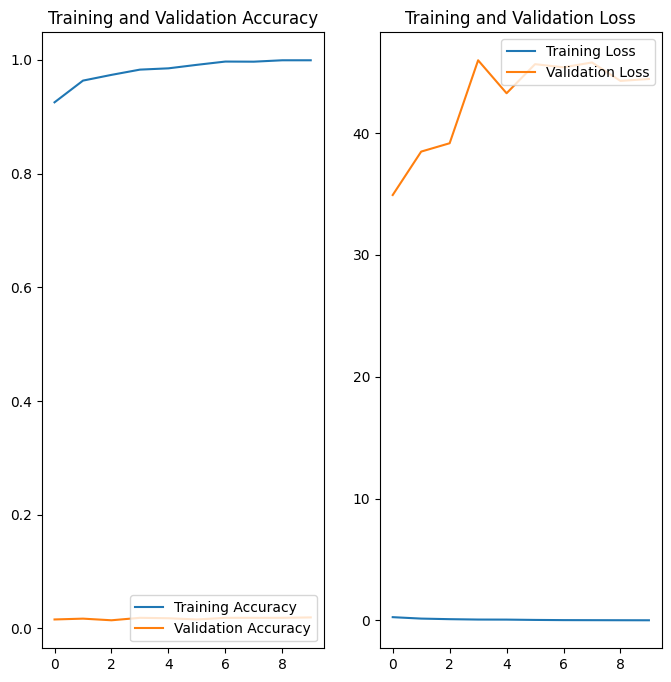

In [ ]:
# Evaluate model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Snorlax
66


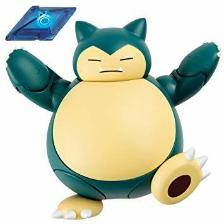

In [ ]:
n = 475
image = test_ds['image'][n]
label =  test_ds['labels'][n]
print("pokemon name: ", class_names[label], "label: ", label)
image

In [ ]:
img_array = tf.keras.utils.img_to_array(test_ds['image'][n])
img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array) ## it is for large predict batches
predictions = model(img_array, training=False)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Dragonite with a 70.86 percent confidence.
